## Libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Parameters to improve default styles of matplotlib and seaborn    
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Dataset

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.shape

(20640, 10)

## Preprocessing

### Missing data

In [6]:
missing_data = df.isnull().sum()
print(f'Number of missing values per column \n\n{missing_data}')

missing_percentage = (missing_data/ len(df)) * 100
print(f'\nPercentage of missing values per column\n\n{missing_percentage}')

Number of missing values per column 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing values per column

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [7]:
# Dropping the missing values
df = df.dropna()

missing_data = df.isnull().sum()
print(f'Number of missing values per column \n\n{missing_data}')

Number of missing values per column 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Data cleaning

#### median_income

In [8]:
fig = px.box(df, x = 'median_income', title='Outlier Analysis in median_income')
fig.update_layout(bargap=0.1)
fig.show()

Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)

IQR = Q3 - Q1

print(f'Q1  {Q1}')
print(f'Q3  {Q3}')
print(f'IQR {IQR}') 
print()

# Define bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound {lower_bound}')
print(f'upper_bound {upper_bound}')
print()

df_no_outliers_0 = df[(df['median_income'] >= lower_bound) & (df['median_income'] <= upper_bound)]

print(f'Original data shape {df.shape}')
print(f'New data shape      {df_no_outliers_0.shape}')

fig = px.box(df_no_outliers_0, x = 'median_income', title='Outlier Analysis in median_income')
fig.update_layout(bargap=0.1)
fig.show()

Q1  2.5637
Q3  4.744
IQR 2.1803

lower_bound -0.70675
upper_bound 8.01445

Original data shape (20433, 10)
New data shape      (19763, 10)


#### Total_rooms 

In [9]:
fig = px.box(df_no_outliers_0, x = 'total_rooms', title='Outlier Analysis in total_rooms')
fig.update_layout(bargap=0.1)
fig.show()

Q1 = df_no_outliers_0['total_rooms'].quantile(0.25)
Q3 = df_no_outliers_0['total_rooms'].quantile(0.75)

IQR = Q3 - Q1

print(f'Q1  {Q1}')
print(f'Q3  {Q3}')
print(f'IQR {IQR}') 
print()

# Define bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound {lower_bound}')
print(f'upper_bound {upper_bound}')
print()

df_no_outliers_1 = df_no_outliers_0[(df_no_outliers_0['total_rooms'] >= lower_bound) & (df_no_outliers_0['total_rooms'] <= upper_bound)]

print(f'Original data shape {df.shape}')
print(f'Original data shape {df_no_outliers_0.shape}')
print(f'New data shape      {df_no_outliers_1.shape}')

fig = px.box(df_no_outliers_1, x = 'total_rooms', title='Outlier Analysis in total_rooms')
fig.update_layout(bargap=0.1)
fig.show()

Q1  1442.0
Q3  3114.0
IQR 1672.0

lower_bound -1066.0
upper_bound 5622.0

Original data shape (20433, 10)
Original data shape (19763, 10)
New data shape      (18520, 10)


#### Population

In [10]:
fig = px.box(df_no_outliers_1, x = 'population', title='Outlier Analysis in population')
fig.update_layout(bargap=0.1)
fig.show()

Q1 = df_no_outliers_1['population'].quantile(0.25)
Q3 = df_no_outliers_1['population'].quantile(0.75)

IQR = Q3 - Q1

print(f'Q1  {Q1}')
print(f'Q3  {Q3}')
print(f'IQR {IQR}') 
print()

# Define bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound {lower_bound}')
print(f'upper_bound {upper_bound}')
print()

df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1['population'] >= lower_bound) & (df_no_outliers_1['population'] <= upper_bound)]

print(f'Original data shape {df.shape}')
print(f'Original data shape {df_no_outliers_0.shape}')
print(f'Original data shape {df_no_outliers_1.shape}')
print(f'New data shape      {df_no_outliers_2.shape}')

fig = px.box(df_no_outliers_2, x = 'population', title='Outlier Analysis in population')
fig.update_layout(bargap=0.1)
fig.show()

Q1  770.0
Q3  1595.25
IQR 825.25

lower_bound -467.875
upper_bound 2833.125

Original data shape (20433, 10)
Original data shape (19763, 10)
Original data shape (18520, 10)
New data shape      (17962, 10)


#### households

In [11]:
fig = px.box(df_no_outliers_2, x = 'households', title='Outlier Analysis in households')
fig.update_layout(bargap=0.1)
fig.show()

Q1 = df_no_outliers_2['households'].quantile(0.25)
Q3 = df_no_outliers_2['households'].quantile(0.75)

IQR = Q3 - Q1

print(f'Q1  {Q1}')
print(f'Q3  {Q3}')
print(f'IQR {IQR}') 
print()

# Define bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound {lower_bound}')
print(f'upper_bound {upper_bound}')
print()

df_no_outliers_3 = df_no_outliers_2[(df_no_outliers_2['households'] >= lower_bound) & (df_no_outliers_2['households'] <= upper_bound)]

print(f'Original data shape {df.shape}')
print(f'Original data shape {df_no_outliers_0.shape}')
print(f'Original data shape {df_no_outliers_1.shape}')
print(f'Original data shape {df_no_outliers_2.shape}')
print(f'New data shape      {df_no_outliers_3.shape}')

fig = px.box(df_no_outliers_3, x = 'households', title='Outlier Analysis in households')
fig.update_layout(bargap=0.1)
fig.show()

Q1  271.0
Q3  539.0
IQR 268.0

lower_bound -131.0
upper_bound 941.0

Original data shape (20433, 10)
Original data shape (19763, 10)
Original data shape (18520, 10)
Original data shape (17962, 10)
New data shape      (17565, 10)


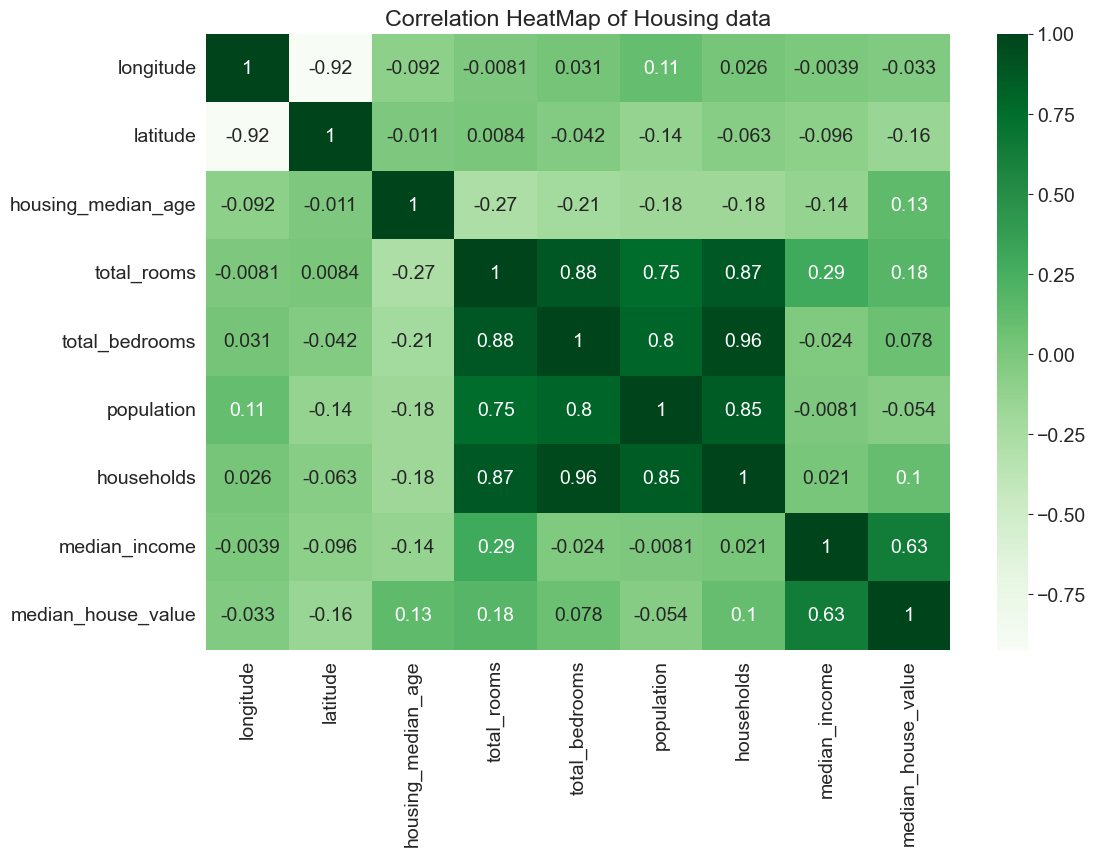

In [12]:
df = df_no_outliers_3

# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation HeatMap of Housing data')
plt.show()

### Categorical column

In [13]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
# Create dummy variables
ocean_proximity_dummies = pd.get_dummies(df['ocean_proximity'], prefix='op')

# Convert boolean values to integers (0 and 1)
ocean_proximity_dummies = ocean_proximity_dummies.astype(int)

# Display the dummy variables
ocean_proximity_dummies

,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [16]:
df = pd.concat([df.drop('ocean_proximity', axis=1), ocean_proximity_dummies], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


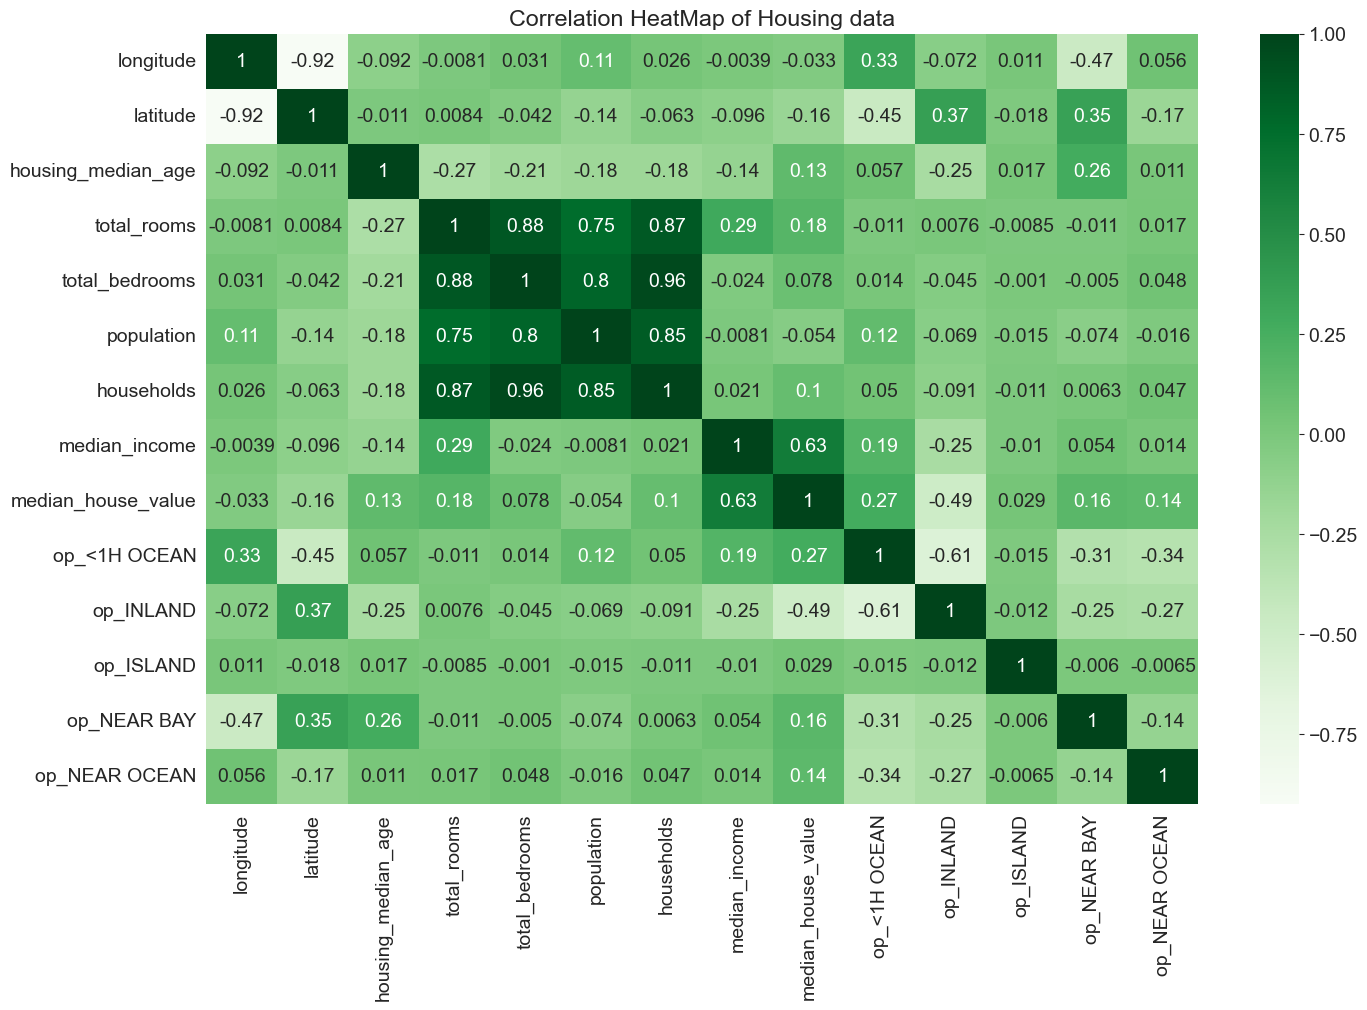

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Correlation HeatMap of Housing data')
plt.show()

### Dealing with multicollinearity 

In [18]:
df = df.drop('total_bedrooms', axis=1)

df

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


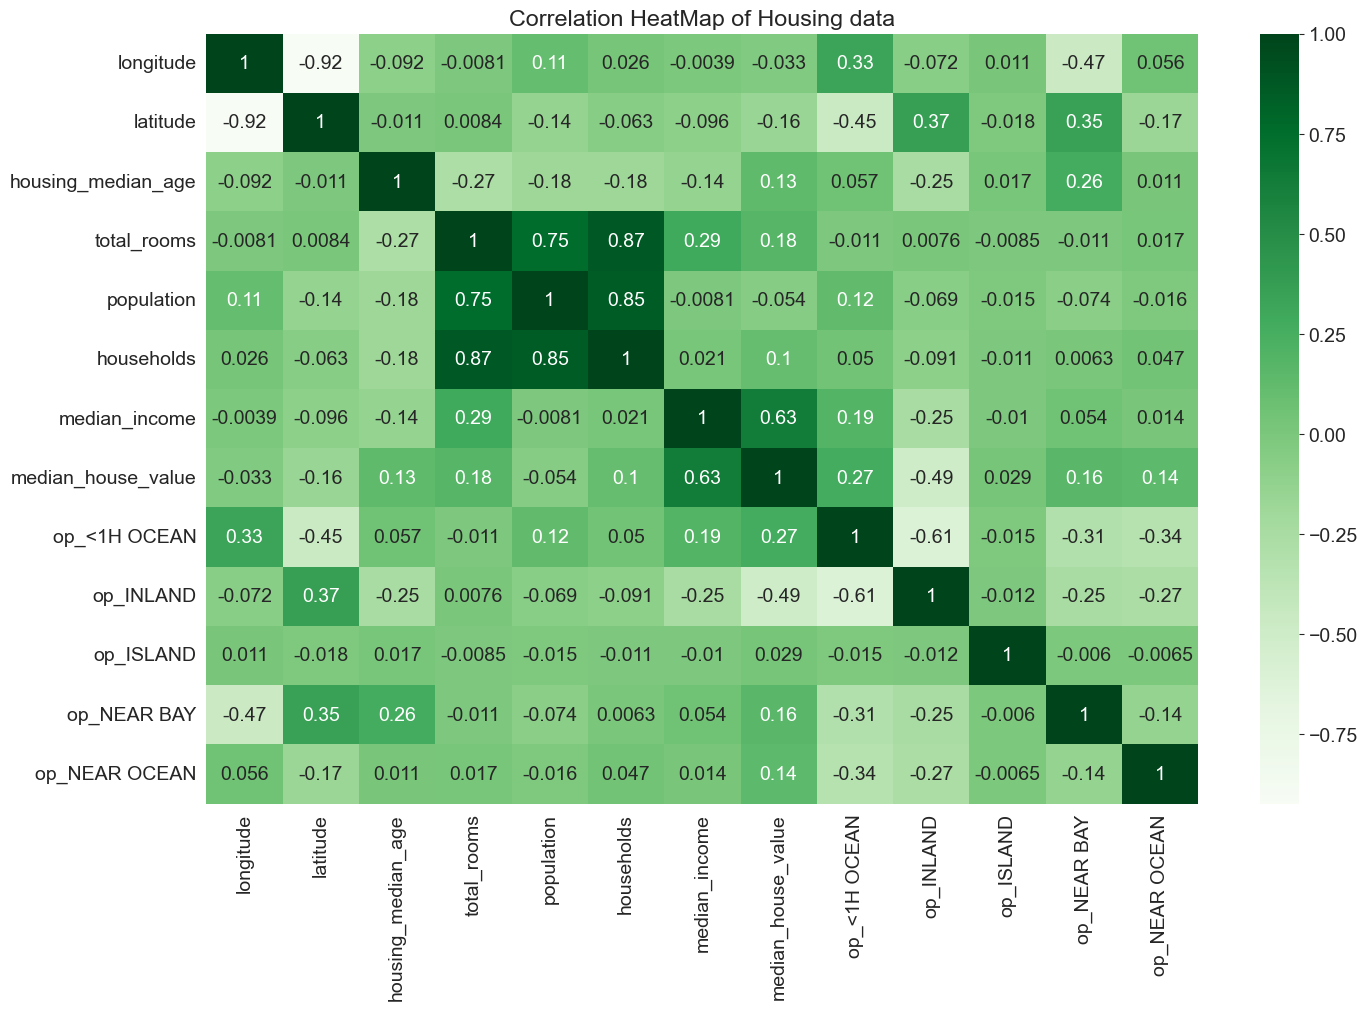

In [19]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Correlation HeatMap of Housing data')
plt.show()

## Splitting Dataset

In [20]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'op_<1H OCEAN', 'op_INLAND', 'op_ISLAND', 'op_NEAR BAY', 'op_NEAR OCEAN']

target = ['median_house_value']

X = df[features]
y = df[target]

In [21]:
# Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Testing data shape:  {X_test.shape}, {y_test.shape}')

Training data shape: (14052, 12), (14052, 1)
Testing data shape:  (3513, 12), (3513, 1)


# Model 1

## Casual analysis Model

In [23]:
# Adding a constant to the predictors because the statmodels' OLS does not include it

X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
16292,1.0,-121.24,37.96,37.0,1175.0,951.0,267.0,2.8750,0,1,0,0,0
11578,1.0,-118.03,33.77,21.0,3803.0,1511.0,829.0,3.0000,1,0,0,0,0
6789,1.0,-118.16,34.09,52.0,1722.0,1122.0,425.0,3.1204,1,0,0,0,0
15546,1.0,-117.09,33.10,21.0,2876.0,1387.0,499.0,3.8292,1,0,0,0,0
19348,1.0,-122.85,38.62,16.0,4418.0,1908.0,697.0,4.5913,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13290,1.0,-117.66,34.07,36.0,2072.0,964.0,395.0,2.8702,0,1,0,0,0
14127,1.0,-117.09,32.75,24.0,1245.0,1230.0,362.0,1.8750,0,0,0,0,1
6240,1.0,-117.98,34.06,33.0,1353.0,1079.0,237.0,4.5417,1,0,0,0,0
968,1.0,-121.88,37.67,25.0,2244.0,937.0,324.0,6.4524,0,1,0,0,0


In [24]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
16292,-121.24,37.96,37.0,1175.0,951.0,267.0,2.8750,0,1,0,0,0
11578,-118.03,33.77,21.0,3803.0,1511.0,829.0,3.0000,1,0,0,0,0
6789,-118.16,34.09,52.0,1722.0,1122.0,425.0,3.1204,1,0,0,0,0
15546,-117.09,33.10,21.0,2876.0,1387.0,499.0,3.8292,1,0,0,0,0
19348,-122.85,38.62,16.0,4418.0,1908.0,697.0,4.5913,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13290,-117.66,34.07,36.0,2072.0,964.0,395.0,2.8702,0,1,0,0,0
14127,-117.09,32.75,24.0,1245.0,1230.0,362.0,1.8750,0,0,0,0,1
6240,-117.98,34.06,33.0,1353.0,1079.0,237.0,4.5417,1,0,0,0,0
968,-121.88,37.67,25.0,2244.0,937.0,324.0,6.4524,0,1,0,0,0


In [25]:
# Fitting the model
model = sm.OLS(y_train, X_train_const).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     2032.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:29:12   Log-Likelihood:            -1.7601e+05
No. Observations:               14052   AIC:                         3.521e+05
Df Residuals:                   14040   BIC:                         3.521e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.656e+06   8.42e+04    -19.671      0.000   -1.82e+06   -1.49e+06
longitude          -2.421e+04   1169.631    -20.702      0.000   -2.65e+04   -2.19e+04
latitude           -2.413e+04   1153.868    -20.915      0.000   -2.64e+04   -2.19e+04
housing_median_age  1075.4763     51.504     20.881      0.000     974.521    1176.431
total_rooms           -4.7265      1.485     -3.183      0.001      -7.637      -1.816
population           -86.7676      2.008    -43.203      0.000     -90.704     -82.831
households           285.9711      8.827     32.398      0.000     268.669     303.273
median_income       4.038e+04    521.542     77.430      0.000    3.94e+04    4.14e+04
op_<1H OCEAN       -3.543e+05   1.74e+04    -20.327      0.000   -3.88e+05    -3.2e+05
op_INLAND          -3.914e+05   1.64e+04    -23.908      0.000   -4.23e+05   -3.59e+05
op_ISLAND          -1.944e+05   3.04e+04     -6.389      0.000   -2.54e+05   -1.35e+05
op_NEAR BAY        -3.603e+05    1.8e+04    -20.047      0.000   -3.96e+05   -3.25e+05
op_NEAR OCEAN      -3.557e+05   1.79e+04    -19.926      0.000   -3.91e+05   -3.21e+05
==============================================================================
Omnibus:                     3359.658   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10693.178
Skew:                           1.215   Prob(JB):                         0.00
Kurtosis:                       6.515   Cond. No.                     5.21e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.75e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Interpretation

This output is from an Ordinary Least Squares (OLS) regression analysis, which models the relationship between a dependent variable (in this case, `median_house_value`) and several independent variables (like `longitude`, `latitude`, `median_income`, etc.). Here's a breakdown of the key parts of the output:

### 1. **Model Summary**
- **Dep. Variable:** `median_house_value` - This is the dependent variable the model aims to predict.
- **R-squared:** `0.614` - This indicates that 60.4% of the variability in the dependent variable is explained by the model. A value closer to 1 suggests a better fit.
- **Adj. R-squared:** `0.614` - Adjusted for the number of predictors, helping to prevent overfitting.
- **F-statistic:** `2032.` - Tests the overall significance of the model. A high value suggests that the model is statistically significant.
- **Prob (F-statistic):** `0.00` - The p-value associated with the F-statistic, indicating strong statistical significance.
- **No. Observations:** `14,052` - The number of data points used in the regression.
- **Df Residuals:** `14,040` - Degrees of freedom of the residuals, reflecting the difference between the total observations and the estimated parameters.
- **Df Model:** `11` - Number of predictors in the model.
- **AIC (Akaike Information Criterion):** `3.521e+05` - A measure of the model's quality, with lower values being preferable.
- **BIC (Bayesian Information Criterion):** `3.521e+05` - Similar to AIC, but includes a penalty for the number of parameters.

### 2. **Coefficients Table**
This table provides estimates for each predictor:
- **coef:** The estimated impact of each predictor on `median_house_value`. For instance, `longitude` has a coefficient of `-2.462e+04`, implying that for every one-unit increase in longitude, the median house value decreases by approximately 24,620 units.
- **std err:** The standard error of the coefficient, with smaller values indicating more precise estimates.
- **t:** The t-statistic, calculated as `coef / std err`. Higher absolute values indicate that the predictor is statistically significant.
- **P>|t|:** The p-value for the t-statistic. Values below 0.05 indicate statistical significance for the corresponding predictor.
- **[0.025 0.975]:** The 95% confidence interval for the coefficient. If this interval excludes 0, the predictor is significant.

### 3. **Other Statistics**
- **Omnibus:** `3487.338` - A test for the skewness and kurtosis of the residuals. High values suggest non-normality.
- **Durbin-Watson:** `1.963` - Tests for autocorrelation in the residuals. Values close to 2 suggest little to no autocorrelation.
- **Prob(Omnibus):** `0.000` - The p-value for the Omnibus test, indicating a significant departure from normality.
- **Jarque-Bera (JB):** `11292.233` - Another test for normality, where high values indicate non-normality.
- **Skew:** `1.255` - Measures the asymmetry of the residuals. Positive skew suggests a longer right tail.
- **Kurtosis:** `6.603` - Measures the "tailedness" of the residuals, with values above 3 suggesting heavy tails.
- **Cond. No.:** `4.80e+18` - A high condition number, indicating potential multicollinearity, where predictors may be highly correlated, making coefficient estimates less stable.

### 4. Key Predictors
- **const:** The intercept of the model.
- **longitude, latitude:** Geographic coordinates.
- **housing_median_age:** Median age of houses in the region.
- **total_rooms:** Total number of rooms in the area.
- **population:** Population size.
- **households:** Number of households in the area.
- **median_income:** Median income level of the population.
- **ocean_proximity_<1H OCEAN, ocean_proximity_INLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN:** Dummy variables representing the categorical variable for proximity to the ocean.

### 5. **Notes**
- **Covariance Type: nonrobust** - Indicates that standard errors are calculated under the assumption of homoscedasticity (constant variance of errors).
- **Condition number is large:** `4.80e+18` - Suggests issues with multicollinearity, where some predictors are highly correlated, potentially affecting the stability of the model.

### Interpretation
The model explains around 60.4% of the variance in `median_house_value`. Many of the predictors are statistically significant, as indicated by low p-values. However, the large condition number indicates potential multicollinearity, which may affect the reliability of the coefficient estimates. Additionally, tests like the Omnibus and Jarque-Bera suggest that the residuals are not normally distributed, which could indicate that the model does not fully capture the underlying data distribution.

This model provides meaningful insights into the factors affecting house values, but improvements may be needed to address multicollinearity and the normality of residuals.

### Prediction

In [27]:
# Adding a constant yo the predictors because the statmodels' OLS does not include it
X_test_const = sm.add_constant(X_test)
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,op_<1H OCEAN,op_INLAND,op_ISLAND,op_NEAR BAY,op_NEAR OCEAN
5088,1.0,-118.28,33.98,19.0,883.0,726.0,277.0,0.9809,1,0,0,0,0
8360,1.0,-118.34,33.97,45.0,2230.0,949.0,344.0,5.5000,1,0,0,0,0
18541,1.0,-122.01,36.95,52.0,1217.0,508.0,237.0,2.0547,0,0,0,0,1
2020,1.0,-119.80,36.70,28.0,1592.0,962.0,282.0,1.3304,0,1,0,0,0
1224,1.0,-120.57,38.20,13.0,4110.0,1796.0,706.0,2.6417,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,1.0,-118.17,34.04,39.0,563.0,682.0,137.0,2.7500,1,0,0,0,0
17216,1.0,-119.71,34.43,48.0,2408.0,1005.0,497.0,3.5213,1,0,0,0,0
4569,1.0,-118.27,34.07,42.0,1175.0,1593.0,407.0,2.3438,1,0,0,0,0
7803,1.0,-118.10,33.90,40.0,1880.0,1229.0,378.0,4.4167,1,0,0,0,0


In [28]:
# Make predictions
predictions = model.predict(X_test_const)
predictions

5088     105743.983453
8360     311339.808002
18541    207651.632295
2020      41186.627535
1224      97439.767596
             ...      
7185     159877.896429
17216    294785.324821
4569     143672.405901
7803     245175.831268
908      296568.892800
Length: 3513, dtype: float64

In [29]:
# Calculate MSE and RMSE
rmse = root_mean_squared_error(y_test, predictions)
rmse

67988.96430565552

# Model 2

### Scaling parameters

In [30]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 67988.96430565543
